In [91]:
#import data
import pandas as pd
data = pd.read_csv("Jan to Mar15 2023.csv")

In [30]:
data

,Selected,RecordNo,Age,Recording Date,"Gender(Male,Female)",Height,HeightUnit,Weight,WeightUnit,BMI,...,Desats LT 70,PLM:Total,Sleep Eff.Index,Record Type,SleepStudy:EKG Analysis,Sleep:Generic11:,Sleep:Generic20:,LEG1 Index,LEG2 Index,Scorer
0,0,XBDYM3BFZC0AQGB,6.7407,1/3/2023 21:08,female,116.5,cm,29.0,kg,21.367,...,0,0,80.546,PSG+TcCO2,Possible sinus arrhythmia. Sinus rate varies....,Flat with 2 pillows.,None,0.084746,0.084746,Alfonso Padilla
1,0,XBDYM3BFZC0CIVD,31.9870,1/4/2023 21:22,female,62.0,in,120.0,lb,21.948,...,0,0,89.362,PSG+TcCO2,Possible accelerated junctional rhythm. Inver...,Flat with 2 pillows.,NaN,0.000000,0.000000,Joy Nishihira
2,0,XBDYM3BFZC0GFDS,21.8020,1/6/2023 22:49,male,67.0,in,325.0,lb,50.903,...,0,0,85.606,Split,NSR with varying rate and possible infrequent ...,Flat with one pillow.,NaN,0.000000,0.000000,"Weiguang Zhong : Neurotronics, Inc."
3,0,XBDYM3BFZC0I5IJ,4.6271,1/7/2023 21:11,male,43.0,in,53.0,lb,20.153,...,0,0,82.269,PSG+TcCO2,NSR,Flat with 1 pillow,NaN,0.000000,0.000000,"Weiguang Zhong : Neurotronics, Inc."
4,0,XBDYM3BFZC0K2BT,7.0775,1/8/2023 21:57,male,49.0,in,52.0,lb,15.227,...,2,3,96.185,PSG+TcCO2,NSR with varying rate and possible PAC.,HOB flat with one pillow.,NaN,0.216350,0.649040,Alfonso Padilla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,XYW8V5B4YC3N33J,54.5230,3/9/2023 22:39,female,68.0,in,409.0,lb,62.189,...,0,0,62.968,PSG+EtCO2,Unremarkable,Elevated w/2 pillows,NaN,1.718100,1.585900,Stephan Dada
396,0,XYW8V5B4YC3P112,59.5850,3/10/2023 22:31,female,68.0,in,312.0,lb,47.440,...,0,14,86.999,SPLIT/CPAP,NSR,Elevated 8 degrees with 2 pillows,NaN,2.384700,1.907800,Abigail Maller
397,0,XYW8V5B4YC3QRE2,61.1920,3/11/2023 20:30,female,65.0,in,180.0,lb,29.954,...,0,7,74.548,CPAP/ASV,Unremarkable,Level w/1 pillow,NaN,4.271800,3.786400,"Weiguang Zhong : Neurotronics, Inc."
398,0,XYW8V5B4YC3SPBN,70.0900,3/12/2023 21:39,female,60.0,in,160.0,lb,31.248,...,0,4,79.587,SPLIT/CPAP,Appeared to be NSR with rare possible sinus pa...,Flat with 2 pillows.,NaN,2.701200,1.719000,"Weiguang Zhong : Neurotronics, Inc."


In [31]:
#Checking missing values
data.isnull().sum()

Selected                     0
RecordNo                     0
Age                          0
Recording Date               0
Gender(Male,Female)          0
Height                       0
HeightUnit                   2
Weight                       0
WeightUnit                   4
BMI                          0
ESS                          0
AHI                          0
AHI:REM                      0
Apnea Counts                 0
Apnea Counts:REM             0
Latency to Sleep Onset       0
Latency to REM               0
Desats LT 90                 0
Desats LT 80                 0
Desats LT 70                 0
PLM:Total                    0
Sleep Eff.Index              0
Record Type                  6
SleepStudy:EKG Analysis      5
Sleep:Generic11:            11
Sleep:Generic20:           342
LEG1 Index                   0
LEG2 Index                   0
Scorer                       0
dtype: int64

In [80]:
#Count of each gender
data.groupby(['Gender(Male,Female)'])['Gender(Male,Female)'].count()

Gender(Male,Female)
female    155
male      245
Name: Gender(Male,Female), dtype: int64

In [5]:
#Each row is unique patient
len(data['RecordNo'])==len(data['RecordNo'].unique())

True

<AxesSubplot:xlabel='Gender(Male,Female)', ylabel='ESS'>

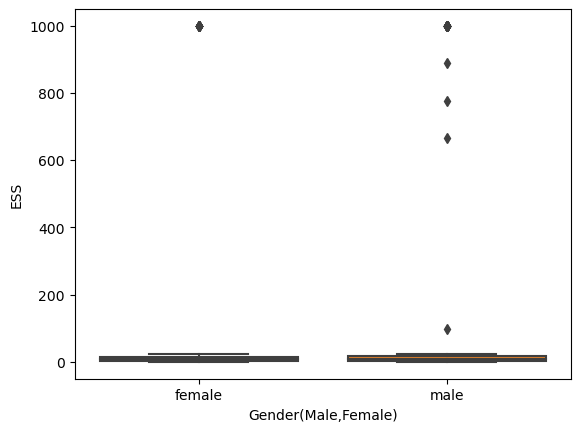

In [83]:
#Boxplot of ESS for each gender
import seaborn as sns
sns.boxplot(data=data,x='Gender(Male,Female)',y='ESS')

Squished boxplot indicates extreme outliers. Since ESS range from 0 to 24, only keep the data with ESS < 25.

In [84]:
ESS = data[(data['ESS']<25)]

<AxesSubplot:xlabel='Gender(Male,Female)', ylabel='ESS'>

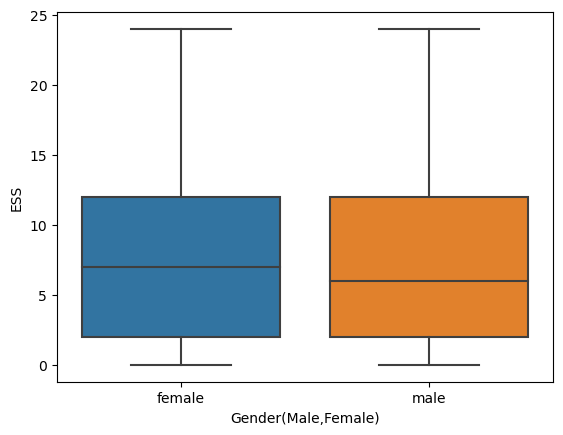

In [86]:
#Boxplot of ESS for new data, after dropping v
sns.boxplot(data=ESS,x='Gender(Male,Female)',y='ESS')

<AxesSubplot:xlabel='PLM:Total', ylabel='ESS'>

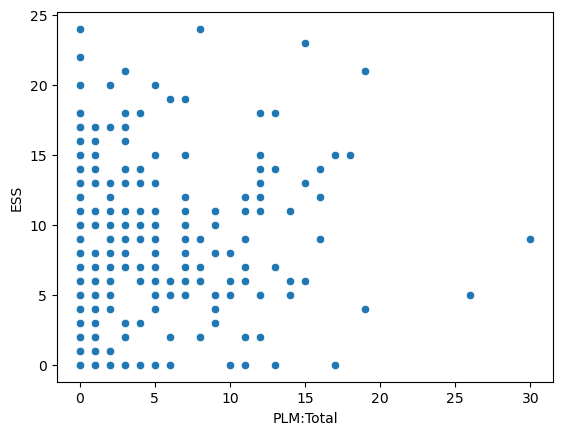

In [87]:
#Scatterplot of ESS and total counts of PLM
sns.scatterplot(data=ESS,x='PLM:Total',y='ESS')

We also look at the scatterplot of ESS > 10 and counts of PLM since ESS > 10 is abnormal.

<AxesSubplot:xlabel='PLM:Total', ylabel='ESS'>

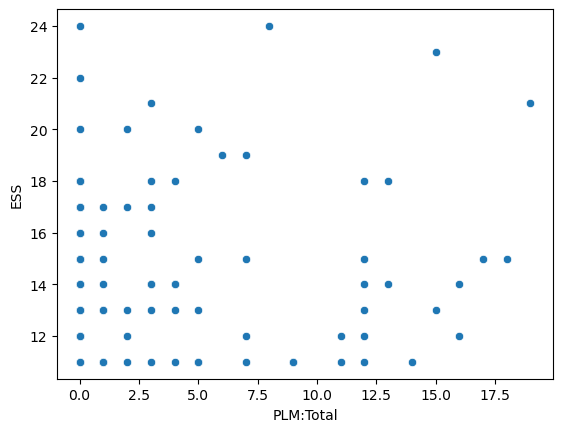

In [88]:
sns.scatterplot(data=ESS[ESS['ESS']>10],x='PLM:Total',y='ESS')

In [102]:
import numpy as np
ESS_abnormal = ESS[ESS['ESS']<10]
np.corrcoef(ESS_abnormal['ESS'],ESS_abnormal['PLM:Total'])

array([[1.        , 0.24105638],
       [0.24105638, 1.        ]])

<AxesSubplot:>

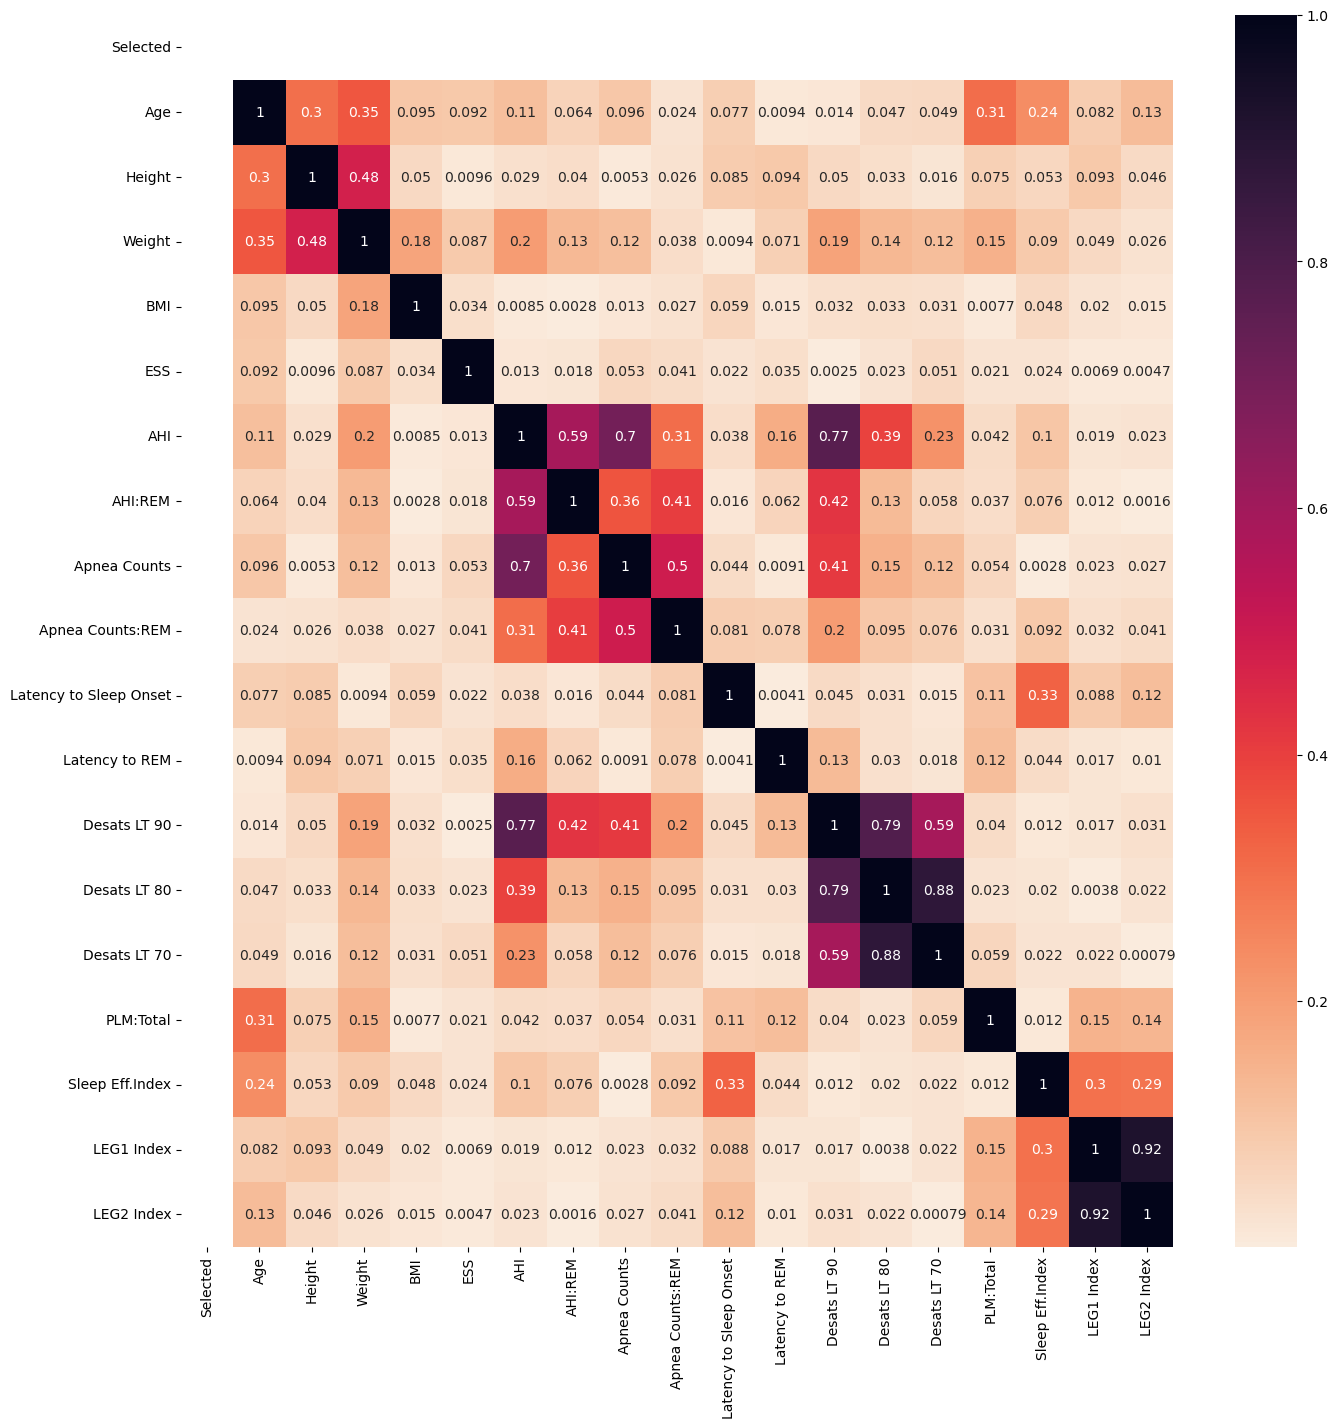

In [53]:
#Correlation heatmap
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 16))
corr_df = data.corr().abs()
sns.heatmap(corr_df, annot = True, cmap = 'rocket_r')

<AxesSubplot:>

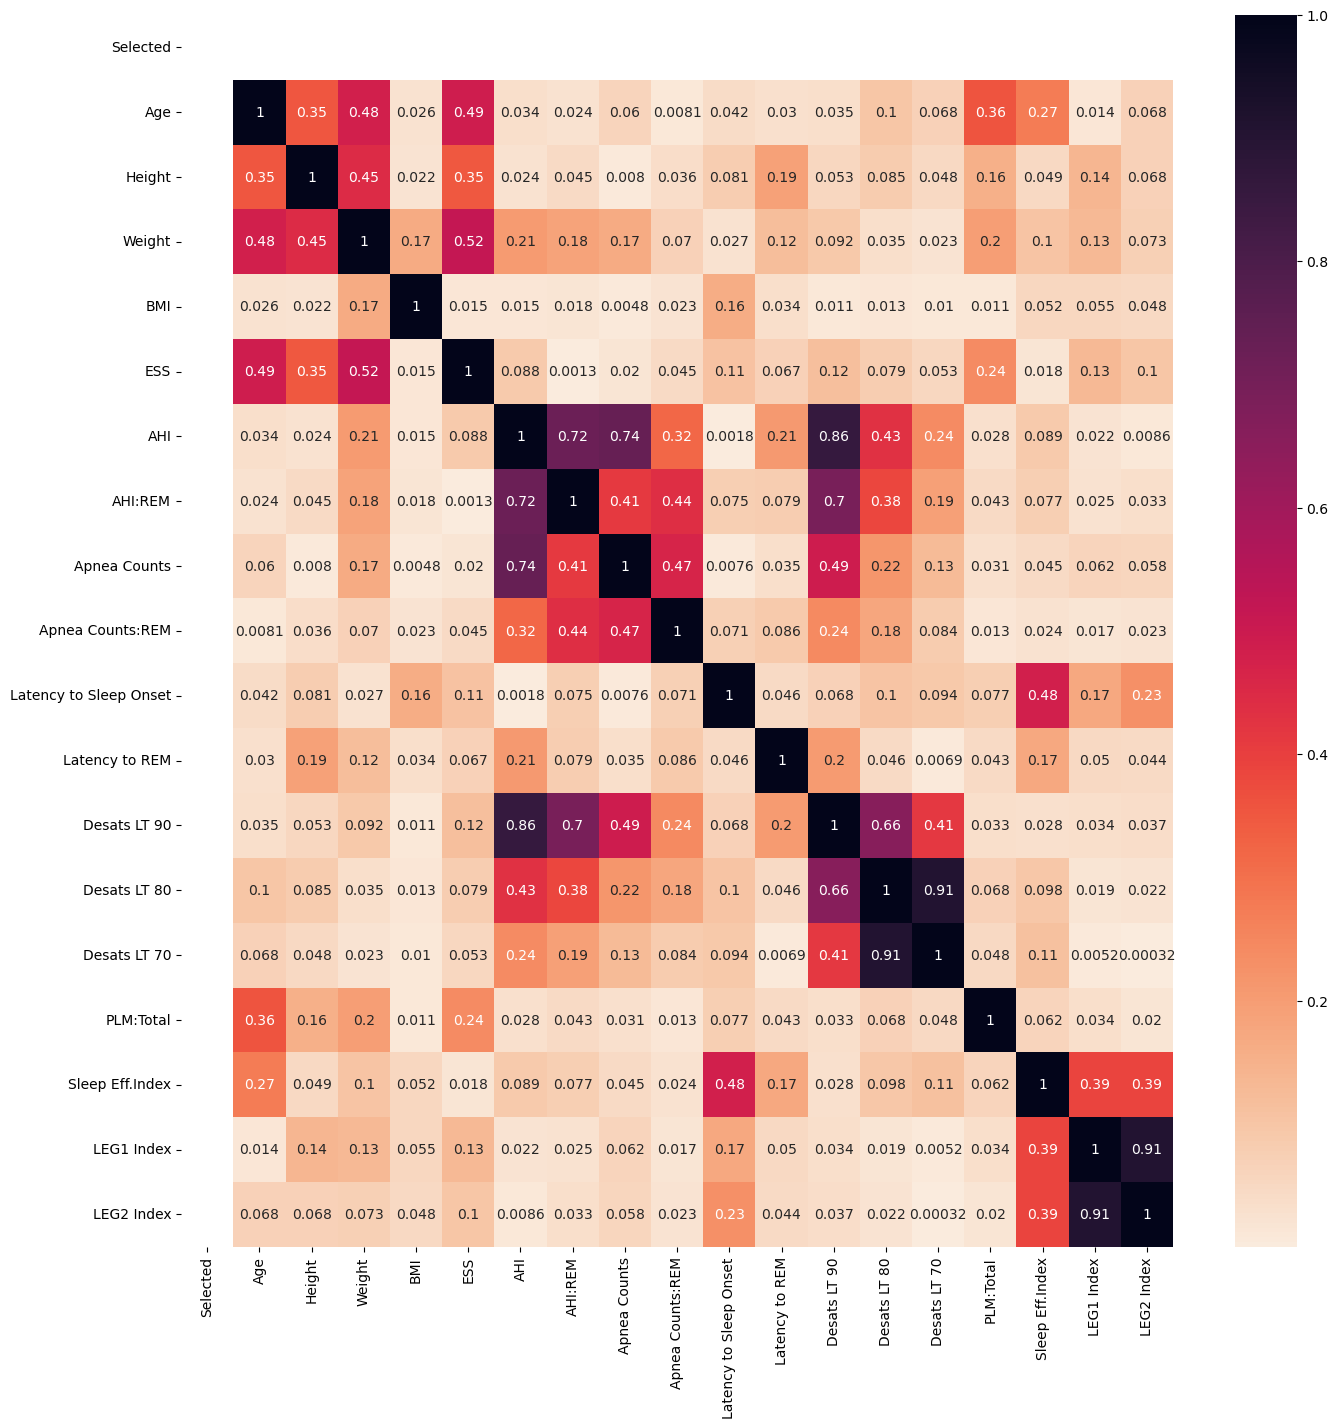

In [103]:
#Correlation heatmap of data with ESS>10
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 16))
corr_df = ESS_abnormal.corr().abs()
sns.heatmap(corr_df, annot = True, cmap = 'rocket_r')

In [108]:
#Correlation of ESS and PLM:Total stratified by gender
fem = ESS_abnormal[ESS_abnormal['Gender(Male,Female)']=='female']
np.corrcoef(fem['ESS'],fem['PLM:Total'])

from scipy.stats.stats import pearsonr

#Pearson test for female
pearsonr(fem['ESS'],fem['PLM:Total'])

C:\Users\User\AppData\Local\Temp\ipykernel_14732\1430233222.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.19846073960123803, pvalue=0.06379772475129296)

In [109]:
man = ESS_abnormal[ESS_abnormal['Gender(Male,Female)']=='male']
np.corrcoef(man['ESS'],man['PLM:Total'])

#Pearson test for male
pearsonr(man['ESS'],man['PLM:Total'])

PearsonRResult(statistic=0.2696407199278311, pvalue=0.0026693292235398475)

In [32]:
#Logistic model
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
#Drop the ESS > 25 since ESS ranges from 0 to 24 
data = data[data['ESS']<25]

In [93]:
ESS = data['ESS']

In [94]:
#Map ESS values into binary variable
binary = lambda x: 1 if(x>10) else 0
ESS_outcome = list(map(binary,ESS))

In [95]:
#Drop unnecessary columns
todrop=['Selected','RecordNo','Recording Date','HeightUnit','WeightUnit','ESS','Record Type','SleepStudy:EKG Analysis','Sleep:Generic11:','Sleep:Generic20:','Scorer']
predictors = data.drop(todrop,axis=1)

In [96]:
#1 if female, 0 if male
predictors['Gender(Male,Female)'] = list(map(lambda x: 1 if(x=='female') else 0, predictors['Gender(Male,Female)']))

In [97]:
predictors

,Age,"Gender(Male,Female)",Height,Weight,BMI,AHI,AHI:REM,Apnea Counts,Apnea Counts:REM,Latency to Sleep Onset,Latency to REM,Desats LT 90,Desats LT 80,Desats LT 70,PLM:Total,Sleep Eff.Index,LEG1 Index,LEG2 Index
0,6.7407,1,116.5,29.0,21.367,1.01690,2.2222,0,0,6.0,160.5,0,0,0,0,80.546,0.084746,0.084746
2,21.8020,0,67.0,325.0,50.903,12.92000,3.8532,14,1,20.5,123.0,8,0,0,0,85.606,0.000000,0.000000
3,4.6271,0,43.0,53.0,20.153,1.76710,3.4286,6,0,70.0,152.0,1,0,0,0,82.269,0.000000,0.000000
5,55.2130,1,70.5,335.0,47.388,8.31890,3.2432,3,1,0.5,323.0,66,0,0,15,80.699,20.901000,17.470000
6,76.0230,0,70.0,185.0,377.550,2.90790,1.5385,6,0,4.5,107.5,0,0,0,0,69.239,9.402300,11.341000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,54.5230,1,68.0,409.0,62.189,25.90300,82.7590,6,5,18.0,75.5,85,6,0,0,62.968,1.718100,1.585900
396,59.5850,1,68.0,312.0,47.440,5.15100,20.3230,3,3,20.0,3.0,5,0,0,14,86.999,2.384700,1.907800
397,61.1920,1,65.0,180.0,29.954,1.94170,0.0000,9,0,14.0,351.0,1,0,0,7,74.548,4.271800,3.786400
398,70.0900,1,60.0,160.0,31.248,24.55700,14.1180,14,0,3.0,231.0,28,0,0,4,79.587,2.701200,1.719000


In [98]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(predictors, ESS_outcome, test_size=0.2, random_state=30)

In [112]:
#Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [113]:
#Use Lasso for feature selection
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(X_train), Y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [114]:
sel_.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True, False,  True, False,  True])

In [115]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]

In [116]:
#Removed features
removed_feats

Index(['AHI', 'Apnea Counts:REM', 'Desats LT 90', 'Desats LT 80', 'PLM:Total',
       'LEG1 Index'],
      dtype='object')

In [117]:
#Transform the training data according to selected variables
X_train_selected = sel_.transform(scaler.transform(X_train))
X_test_selected = sel_.transform(scaler.transform(X_test))

In [120]:
#Fit logistic model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,solver='saga')
clf.fit(X_train_selected,Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [121]:
#Classification report of logistic model
y_test_log=clf.predict(X_test_selected)
from sklearn.metrics import classification_report
report_log=classification_report(Y_test, y_test_log,output_dict=True)
report_log

{'0': {'precision': 0.8148148148148148,
  'recall': 0.8461538461538461,
  'f1-score': 0.830188679245283,
  'support': 52},
 '1': {'precision': 0.38461538461538464,
  'recall': 0.3333333333333333,
  'f1-score': 0.3571428571428571,
  'support': 15},
 'accuracy': 0.7313432835820896,
 'macro avg': {'precision': 0.5997150997150997,
  'recall': 0.5897435897435898,
  'f1-score': 0.59366576819407,
  'support': 67},
 'weighted avg': {'precision': 0.7185015095462856,
  'recall': 0.7313432835820896,
  'f1-score': 0.7242828981775756,
  'support': 67}}

In [140]:
#summary of logistic model
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train_selected)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.640945
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  266
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                           11
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:               -0.009740
Time:                        23:21:17   Log-Likelihood:                -170.49
converged:                       True   LL-Null:                       -168.85
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3611      0.156     -2.314      0.021      -0.667      -0.055
x2             0.1576      0.

In [125]:
#Features that were not removed
non_removed_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]

In [126]:
non_removed_feats

Index(['Age', 'Gender(Male,Female)', 'Height', 'Weight', 'BMI', 'AHI:REM',
       'Apnea Counts', 'Latency to Sleep Onset', 'Latency to REM',
       'Desats LT 70', 'Sleep Eff.Index', 'LEG2 Index'],
      dtype='object')

Result is consistent with correlation test, periodic limb movements or AHI does not really effect ESS.

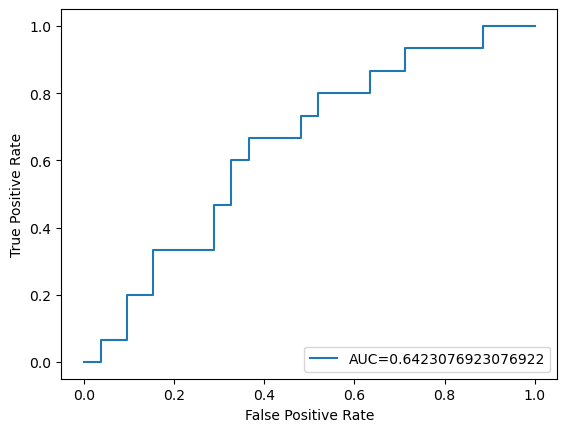

In [134]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred_proba_log = clf.predict_proba(X_test_selected)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_log)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_log)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [139]:
#Confusion matrix
print("Confusion matrix:")
print(metrics.confusion_matrix(Y_test, y_test_log))

Confusion matrix:
[[44  8]
 [10  5]]
